<a href="https://colab.research.google.com/github/piyush1795/Py-piyush/blob/master/Horse_or_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-06-07 05:21:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c19::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  40.7MB/s    in 3.5s    

2019-06-07 05:21:19 (40.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse44-5.png', 'horse25-2.png', 'horse12-1.png', 'horse38-2.png', 'horse27-4.png', 'horse46-3.png', 'horse19-6.png', 'horse20-9.png', 'horse26-9.png', 'horse35-9.png']
['human12-03.png', 'human01-16.png', 'human03-18.png', 'human08-26.png', 'human13-04.png', 'human04-23.png', 'human14-22.png', 'human03-30.png', 'human16-25.png', 'human09-05.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

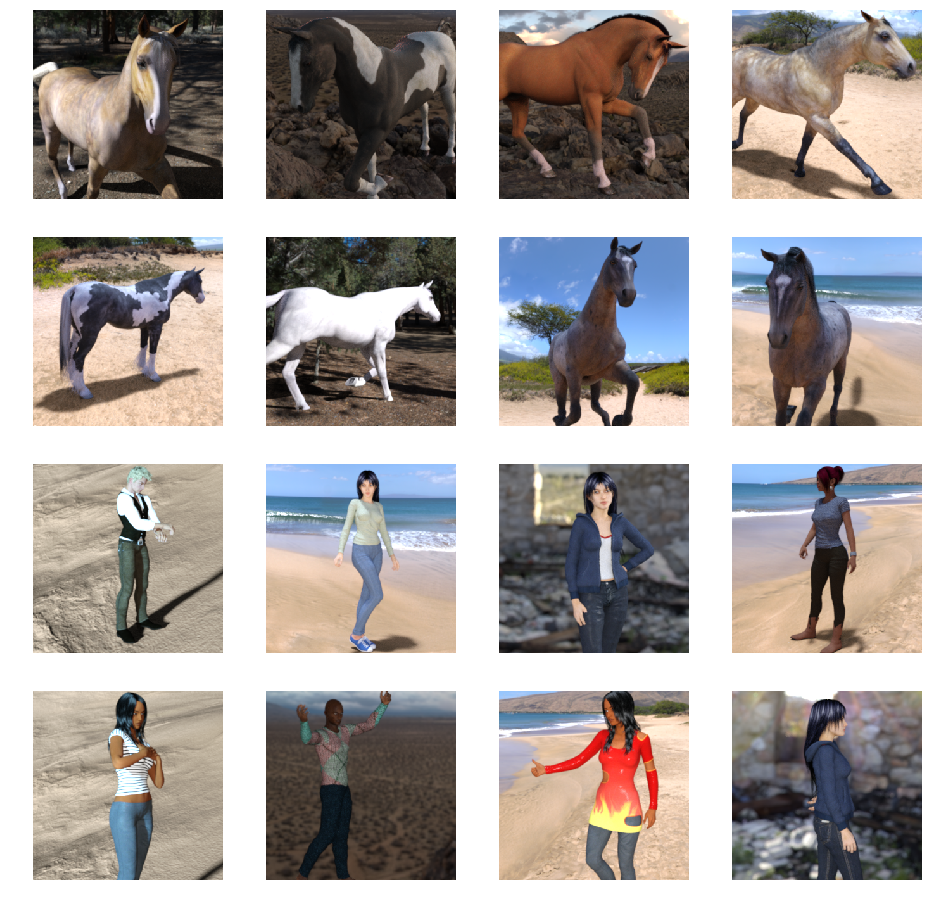

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
                 

next_human_pix = [os.path.join(train_human_dir,fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i + 1)
  sp.axis('off')
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
               optimizer=RMSprop(lr=0.001),
               metrics = ['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
          '/tmp/horse-or-human/',
          target_size=(300,300),
          batch_size=128,
          class_mode='binary')


Found 1027 images belonging to 2 classes.


In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
9/9 [==============================] - 7s 763ms/step - loss: 0.6064 - acc: 0.9133
Epoch 2/15
9/9 [==============================] - 7s 761ms/step - loss: 0.0478 - acc: 0.9825
Epoch 3/15
9/9 [==============================] - 7s 758ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4/15
9/9 [==============================] - 7s 755ms/step - loss: 0.0018 - acc: 1.0000
Epoch 5/15
9/9 [==============================] - 7s 767ms/step - loss: 8.8649e-04 - acc: 1.0000
Epoch 6/15
9/9 [==============================] - 7s 759ms/step - loss: 5.0402e-04 - acc: 1.0000
Epoch 7/15
9/9 [==============================] - 7s 781ms/step - loss: 2.6385e-04 - acc: 1.0000
Epoch 8/15
9/9 [==============================] - 7s 753ms/step - loss: 1.2371e-04 - acc: 1.0000
Epoch 9/15
9/9 [==============================] - 7s 753ms/step - loss: 0.6972 - acc: 0.9172
Epoch 10/15
9/9 [==============================] - 7s 743ms/step - loss: 0.1293 - acc: 0.9776
Epoch 11/15
9/9 [==============================] - 7s

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')

Saving human01-01.png to human01-01.png
[1.]
human01-01.png is a human
